# **Objective:**
Build a model to predict the diabetes disease based on medical data.  
● **Dataset:** PIMA Diabetes Dataset

● **Steps:**  
1. Perform EDA to explore relationships between features and outcomes.  
2. Apply feature selection and scale data for better model performance.  
3. Train models such as Gradient Boosting, SVM, or Neural Networks.  
4. Evaluate model performance using F1 Score and AUC-ROC curves.  
5. Provide insights for healthcare professionals based on model predictions.  
**● Outcome:** A medical prediction model that provides actionable insights for early disease detection and prevention.

# **Upload and Load the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/diabetes.csv")

# Display first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis (EDA)**

In [2]:
# Basic info about dataset
df.info()

# Check for missing values
df.isnull().sum()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Check how many zero values exist in each column
(df == 0).sum()


,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


# **Handle Missing or Incorrect Data**

In [4]:
# List of columns to replace zeros
cols_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with median
for col in cols_to_impute:
    df[col] = df[col].replace(0, df[col].median())

# Verify that zero values are handled
(df == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


# **Feature Scaling and Selection**

In [5]:
from sklearn.preprocessing import StandardScaler

# Select features (X) and target (y)
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train Machine Learning Models**

**1. Train-Test Split**

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**2. Train a Gradient Boosting Classifier**

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize and train model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.7337662337662337
F1 Score: 0.6554621848739496
AUC-ROC Score: 0.7282828282828282


# **Visualize Model Performance**

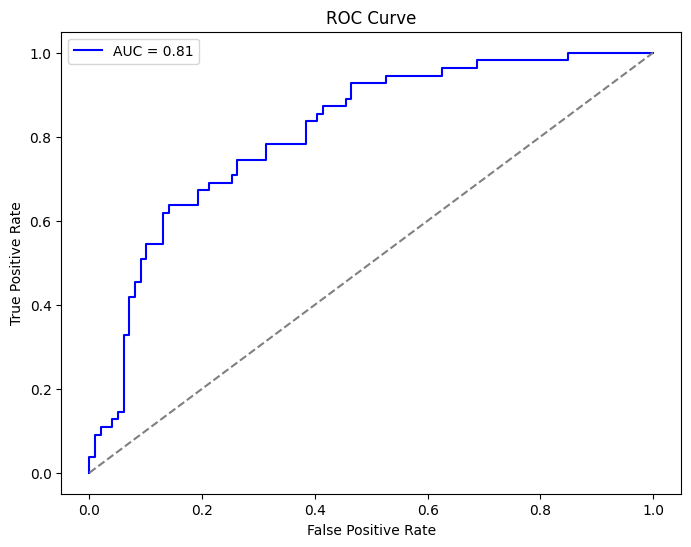

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# **Insights for Healthcare Professionals**
* If Glucose and BMI are high, the risk of diabetes increases.

* Patients with higher age and diabetes pedigree function tend to have a higher probability of diabetes.

* The model can be used in hospitals or clinics for early detection.